In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate fake dataset

In [6]:
# Set a random seed for reproducibility
np.random.seed(1337)

In [7]:
#Training dataset
ages_train = np.random.uniform(50, 80, 2000)
weights_train = np.random.uniform(50, 100, 2000)
SBP_train = np.random.uniform(110, 165, 2000)

#Testing dataset
ages_test = np.random.uniform(50, 80, 400)
weights_test = np.random.uniform(50, 100, 400)
SBP_test = np.random.uniform(110, 165, 400)

# Create a DataFrame for training and testing data

In [8]:
train_data = pd.DataFrame({'Age': ages_train, 'Weight': weights_train, 'SBP': SBP_train})
test_data = pd.DataFrame({'Age': ages_test, 'Weight': weights_test, 'SBP': SBP_test})

In [9]:
# Split the data into independent variables (X) and the target variable (y)
X_train = train_data[['Age', 'Weight']]
y_train = train_data['SBP']
X_test = test_data[['Age', 'Weight']]
y_test = test_data['SBP']

In [10]:
# Build a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [12]:
# Calculate mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Value: {r2}")


Mean Squared Error: 247.8586157793431
R-squared Value: 0.0009449376774551821


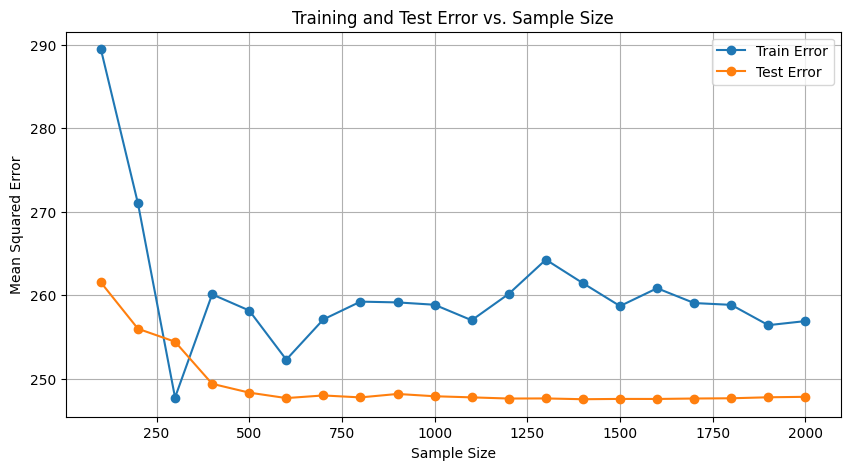

In [13]:
# Create lists to store errors
train_errors = []
test_errors = []
sample_sizes = range(100, 2001, 100)

for sample_size in sample_sizes:
    # Generate a subset of the training data
    subset = train_data.sample(n=sample_size, random_state=1337)
    
    # Split into features and target
    X_subset = subset[['Age', 'Weight']]
    y_subset = subset['SBP']
    
    # Train the model on the subset
    model.fit(X_subset, y_subset)
    
    # Calculate training error
    train_pred = model.predict(X_subset)
    train_errors.append(mean_squared_error(y_subset, train_pred))
    
    # Calculate test error
    test_pred = model.predict(X_test)
    test_errors.append(mean_squared_error(y_test, test_pred))

# Plot the errors
plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, train_errors, label='Train Error', marker='o')
plt.plot(sample_sizes, test_errors, label='Test Error', marker='o')
plt.xlabel('Sample Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training and Test Error vs. Sample Size')
plt.grid(True)
plt.show()


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


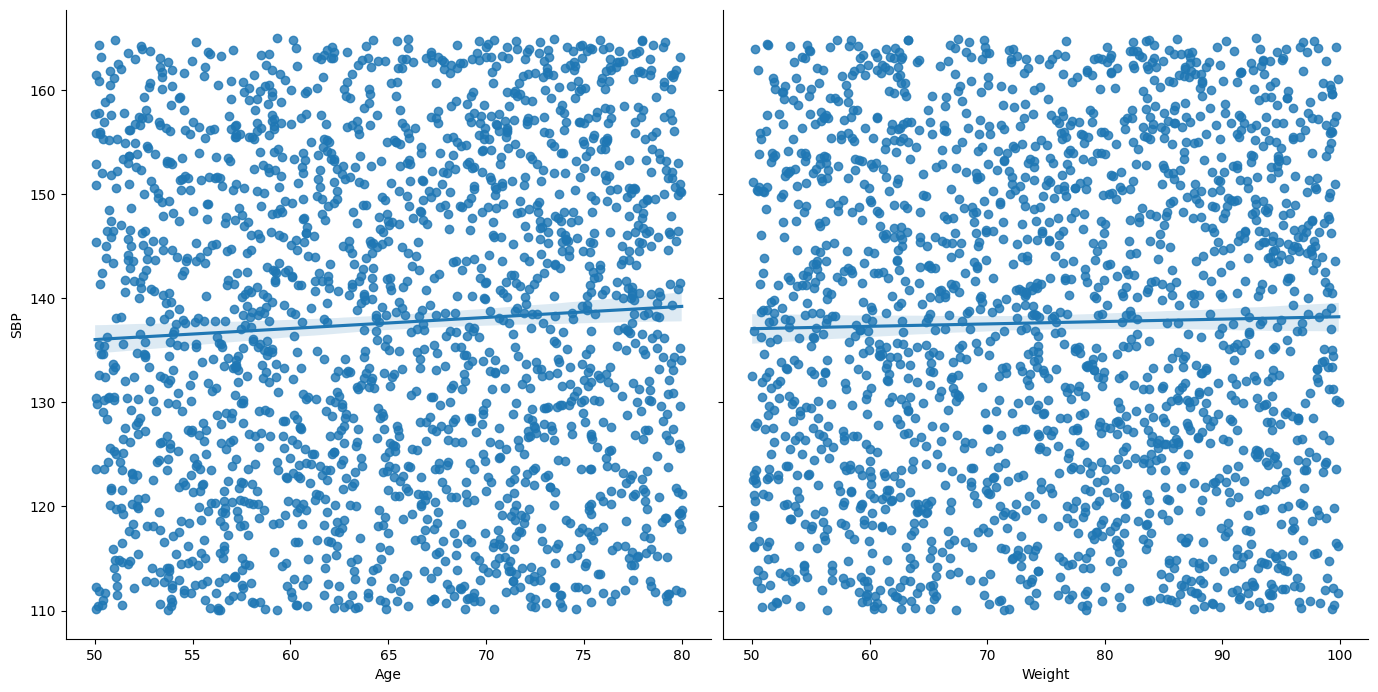

In [17]:
sns.pairplot(train_data, x_vars=['Age', 'Weight'], y_vars=['SBP'], kind='reg',size=7)
plt.show()
